---
# <center><font style="color: purple;">Titanic Survival Prediction</font></center>    
---

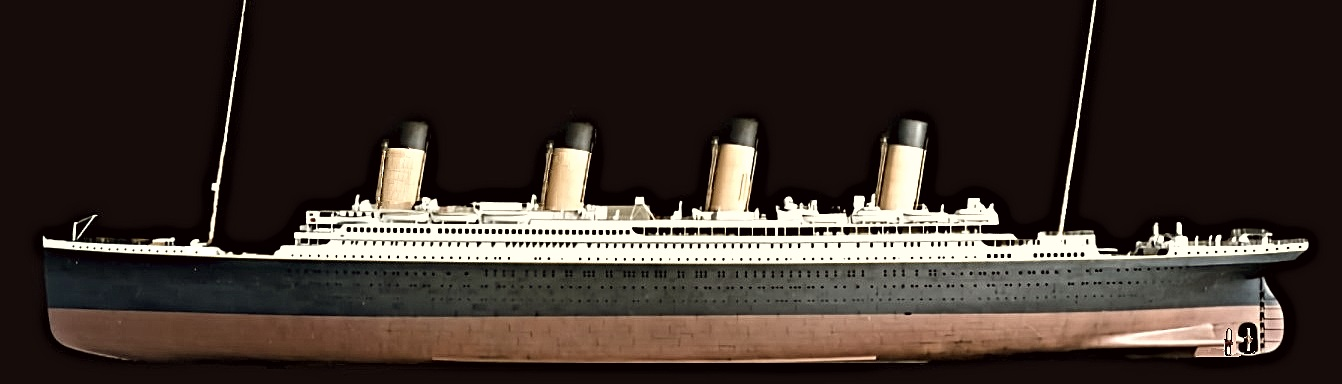

## <center><font color="purple">Synopsis
This project is about building a model that predicts whether a passenger on the Titanic survived or not using the Titanic dataset provided [here](https://www.kaggle.com/datasets/brendan45774/test-file). It is a classic beginner project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## <center><font color="purple">1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## <center><font color="purple">2. Exploratory Analysis

### <center><font color="purple">2.1 Dataset Loading

In [2]:
# data = pd.read_csv ('https://www.kaggle.com/datasets/brendan45774/test-file')
data = pd.read_csv ('../tested.csv')
data.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### <center><font color="purple">2.2 Descriptive Statistics

In [3]:
print (f"Shape of the dataset : {data.shape}")
print ("\========================================\n")

print (f"Variables' type :\n{data.dtypes}")
print ("\========================================\n")

print ("Descriptive statistics :\n")
data.describe ()

Shape of the dataset : (418, 12)
\========================================

Variables' type :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
\========================================

Descriptive statistics :



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### <center><font color="purple">2.3 Data Processing
In the dataset, there are none relevent informations (variables) for making the prediction such as the first column, "PassengerID", "Name", "Ticket" and "Cabin". So we will drop those variables.

In [4]:
none_relevent_variables = ['PassengerId', 'Name', 'Ticket', 'Cabin']
for variable in none_relevent_variables :
    data = data.drop (variable, axis = 1)
data.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


### <center><font color="purple">2.4 Handling Missing (NaN) Values</font></center>
This step is important to ensure accurate analysis and modeling. There are various methods to handle missing values in a pandas dataframe :
* Drop rows or columns
* Fill with a constant value
* Fill with statical measures (mean, median, mode)
* Forward or backward fill
* Interpolation

Let's explore the dataset looking for NaN values.

In [5]:
print (f"Missing values (NaN) in the resulting dataset :\n ")
# Retrive the names of variable that presents NaN values
nan_columns = [column for column in data.columns if data [column].isna ().sum () > 0]
for variable in nan_columns :
    # Count the number of NaN Values
    nan_number = data [variable].isna ().sum ()
    # Compute the percentage according to the entire dataset
    nans_percentage = round ((nan_number / len (data)) * 100, 3)
    print (f"{variable} has {nan_number} NaN values, this represents {nans_percentage} % of the whole dataset.")
print ("\========================================\n")

Missing values (NaN) in the resulting dataset :
 
Age has 86 NaN values, this represents 20.574 % of the whole dataset.
Fare has 1 NaN values, this represents 0.239 % of the whole dataset.
\========================================



In [6]:
print (f"Age's type : {data ['Age'].dtypes}")
print (f"Fare's type : {data ['Fare'].dtypes}")

Age's type : float64
Fare's type : float64


As seen in [2.2](http://localhost:8888/notebooks/task1-titanic-survival-prediction/titanic-survival-prediction.ipynb#2.2-Descriptive-Statistics), both variables "Age" and "Fare" holds numerical values. To handle their NaN values, the appropriate method is to *fill them with a statical measure*. This statical measure is obviouly the mean.

In [7]:
# Get the mean of each of Age and Fare
mean_age = data ['Age'].mean ()
mean_fare = data ['Fare'].mean ()

# Fill NaN values with the mean
data ['Age'].fillna (mean_age, inplace = True)
data ['Fare'].fillna (mean_fare, inplace = True)

In [8]:
# Make sure there is no more NaN values
data.isna ().sum ()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### <center><font color="purple">2.5 Handling Duplicated registrations</font></center>

Here, we will adopt the easiest and obvious way of handling duplicate rows i.e. we are just going to drop them.

In [9]:
print ("Dataset shape before dropping duplicates :", data.shape)

Dataset shape before dropping duplicates : (418, 8)


In [10]:
# Count the number of duplicated values
data.duplicated ().sum ()

38

In [11]:
# Drop duplicated values
data = data.drop_duplicates ()
data.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [12]:
print ("Dataset shape after dropping duplicates :", data.shape)

Dataset shape after dropping duplicates : (380, 8)


### <center><font color="purple">2.5 Encoding Categorical Features</font></center>
To avoid potential bias or assumtions by the coming algorithm, we will do one-hot encoding via the method `pd.get_dummies ()`.

In [13]:
data = pd.get_dummies (data)
print (f"Shape of the encoded data set : {data.shape}")
data.head ()

Shape of the encoded data set : (380, 11)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [14]:
## Label encoding
# encoder = LabelEncoder ()
# data ['Sex'] = encoder.fit_transform (data ['Sex'])
# data ['Embarked'] = encoder.fit_transform (data ['Embarked'])
# data.head ()

Now that all variable in the dataset are numerical, let's see their correlations.Let r be the value of the correlation between two variables :
* If **r < 0**, the two variables are **negatively** correlated
* If **r = 0**, the two variables are **uncorrelated**
* If **r > 0**, the two variables are **positively** correlated

Notes :
* If **0 <= |r| < 0.2**, then **almost no correlation**
* If **0.2 <= |r| < 0.4**, then **low correlation**
* If **0.4 <= |r| < 0.6**, then **average or moderate correlation**
* If **0.6 <= |r| < 0.8**, then **good correlation**
* If **0.8 <= |r| <= 0.1**, then **high correlation**
    - If **0.9 <= |r| <= 0.99**, then **excellent correlation**
    - If **|r| = 1**, **perfect correlation**

<Axes: >

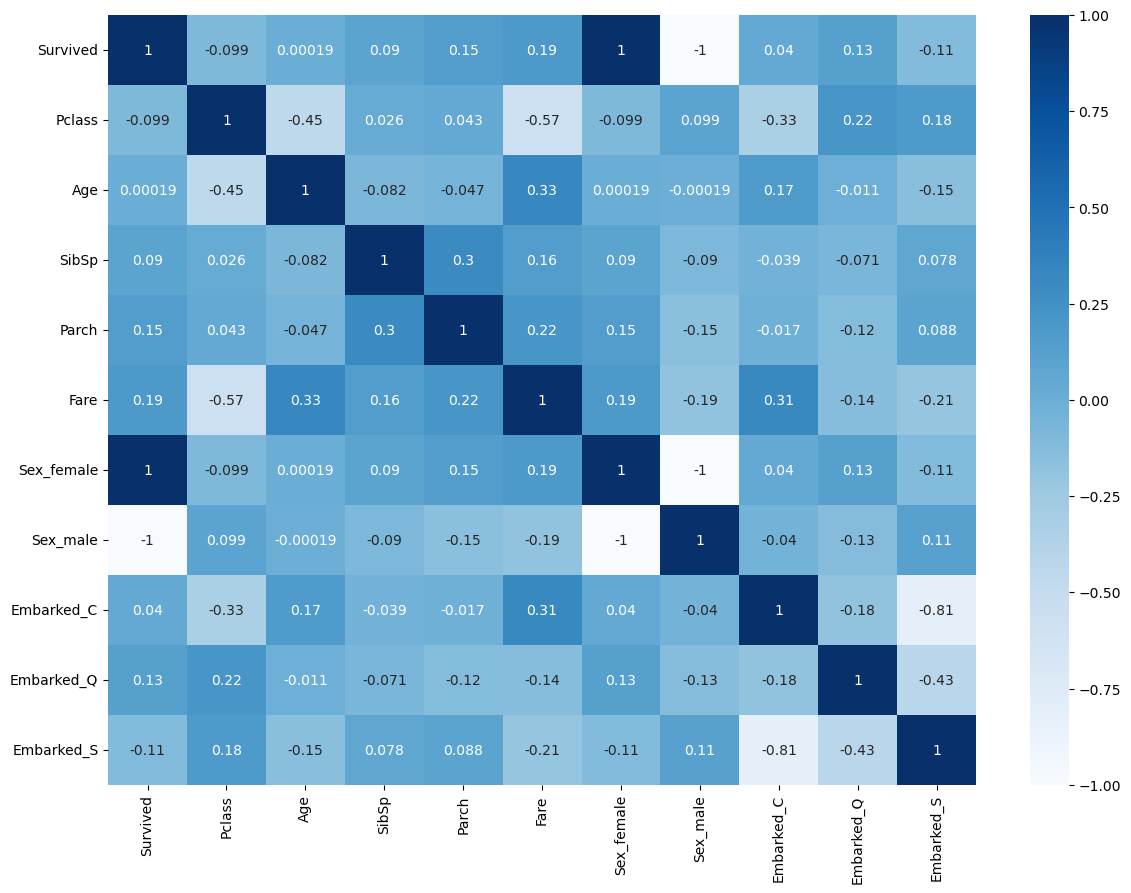

In [15]:
plt.figure (figsize = (14, 10))
correlation = data.corr ()
sns.heatmap (correlation, annot = True, cmap = 'Blues')

### <center><font color="purple">3. Data Splitting</font></center>
For training and testing we splite the dataset into two subsets. But first we need to identify the features and target (variable to predict).

#### <center><font color="purple">3.1. Features & Target</font></center>
Here, the variable to predict is 'Survived' so it is the target and the remaing variables are the features. Let `X` be the features and `y` the target.

In [16]:
# Features
X = data.drop ('Survived', axis = 1)
print (f"Shape features : {X.shape}")
X.head ()

Shape features : (380, 10)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [17]:
# Target
y = data ['Survived']
print (f"Shape of the target : {y.shape}")
y.head ()

Shape of the target : (380,)


0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

#### <center><font color="purple">3.2. Training & Testing Sets</font></center>
In order to split the features and the target into training and testing sets, we will use `train_test_split ()` function provided by the module `model_selection` of the library `sklearn` also known as `scikit-leanr`. We choose to set the testing subset size to 20 % of the dataset.

In [18]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
print (f"Training features' shape : {X_train.shape}")
print (f"Testing features' shape : {X_test.shape}")
print (f"Training target's shape : {y_train.shape}")
print (f"Testing target's shape : {y_test.shape}")

Training features' shape : (304, 10)
Testing features' shape : (76, 10)
Training target's shape : (304,)
Testing target's shape : (76,)


### <center><font color="purple">4. Building Prediction models</font></center>

We want to predict Titanic survival, i.e., classify whether a passenger survived or not. We have several classification algorithms available for this task:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree
4. Random Forest
5. Support Vector Machines (SVC)
6. Neural Network

For this project, we have chosen to build a *Logistic Regression* model, a *K-NN* model, and a *Random Forest* model. Therefore, we will create an instance of the `LogisticRegression ()` model, the `KNeighborsClassifier ()` model, and the `RandomForestClassifier ()` model, respectively.

### <center><font color="purple">4.1. Logistic Regression</font></center>

#### <center><font color="purple">a. Model</font></center>

In [19]:
# Model : LogisticRegression
log_reg_model = LogisticRegression (random_state = 42)

# Training the model
log_reg_model.fit (X_train, y_train)

LogisticRegression(random_state=42)

#### <center><font color="purple">b. Prediction</font></center>

In [20]:
log_reg_pred = log_reg_model.predict (X_test)
log_reg_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

#### <center><font color="purple">c. Confusion Matrix</font></center>
Since we are goig plot the confusion matrix multiple times, let's create a function that do the plot.

In [21]:
def plot_confusion_matrix (y_test, y_pred, model) :
    cf_matrix = confusion_matrix (y_test, y_pred)
    plt.figure (figsize = (5, 3))
    plt.title (f"{model}'s Confusion Matrix")
    sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
    plt.xlabel ('Predicted Values')
    plt.ylabel ('Actual Values')
    plt.show

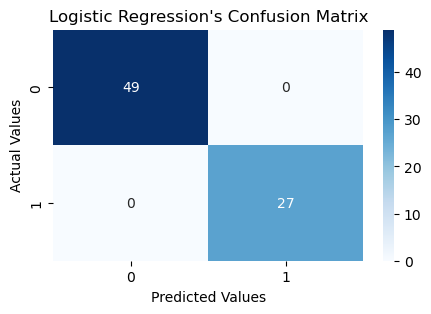

In [22]:
plot_confusion_matrix (y_test, log_reg_pred, "Logistic Regression")

#### <center><font color="purple">d. Accuracy Score</font></center>

In [23]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred) * 100
print (f"The Logistic Regression model's accuracy is : {round (log_reg_accuracy, 2)} %")

The Logistic Regression model's accuracy is : 100.0 %


In [24]:
print (f"\t\t\tClassification report :\n {classification_report (y_test, log_reg_pred)}")

			Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



### <center><font color="purple">4.2. K-Nearest Neighbors</font></center>

#### <center><font color="purple">a. Model</font></center>

In [25]:
# Model : KNN
knn_model = KNeighborsClassifier ()

# Train
knn_model.fit (X_train, y_train)

KNeighborsClassifier()

#### <center><font color="purple">b. Prediction</font></center>

In [26]:
knn_pred = knn_model.predict (X_test)
knn_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

#### <center><font color="purple">c. Confusion Matrix</font></center>

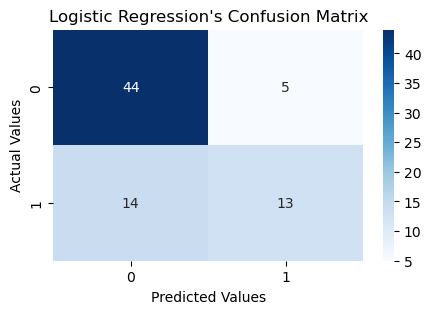

In [27]:
plot_confusion_matrix (y_test, knn_pred, "Logistic Regression")

#### <center><font color="purple">d. Accuracy Score</font></center>

In [28]:
knn_accuracy = accuracy_score (y_test, knn_pred) * 100
print (f"The KNN model's accuracy is : {round (knn_accuracy, 2)} %")

The KNN model's accuracy is : 75.0 %


In [29]:
print (f"\t\t\tClassification report :\n {classification_report (y_test, knn_pred)}")

			Classification report :
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        49
           1       0.72      0.48      0.58        27

    accuracy                           0.75        76
   macro avg       0.74      0.69      0.70        76
weighted avg       0.75      0.75      0.74        76



### <center><font color="purple">4.3. Random Forest</font></center>

#### <center><font color="purple">a. Model</font></center>

In [30]:
# Model : RandomForest
rf_model = RandomForestClassifier (n_estimators = 100)

# Train
rf_model.fit (X_train, y_train)

RandomForestClassifier()

#### <center><font color="purple">b. Prediction</font></center>

In [31]:
rf_pred = rf_model.predict (X_test)
rf_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

#### <center><font color="purple">c. Confusion Matrix</font></center>

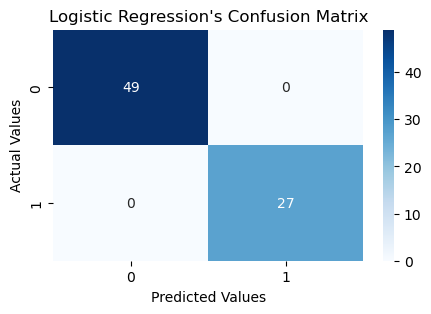

In [32]:
plot_confusion_matrix (y_test, rf_pred, "Logistic Regression")

#### <center><font color="purple">d. Accuracy Score</font></center>

In [33]:
rf_accuracy = accuracy_score (y_test, rf_pred) * 100
print (f"The Random Forest model's accuracy is : {round (rf_accuracy, 2)} %")

The Random Forest model's accuracy is : 100.0 %


In [34]:
print (f"\t\t\tClassification report :\n {classification_report (y_test, rf_pred)}")

			Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



### <center><font color="purple">4.4. Comparing The Tree Models</font></center>

In [35]:
print ("++======================++======================++")
print ("||\tAlgorithms\t||\tAccuracy Scores\t||")
print ("++======================++======================++")
print (f"||\tLogistic Reg\t||\t  {round (log_reg_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tK-NN\t\t||\t  {round (knn_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tRandom Forest\t||\t  {round (rf_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")

++======================++======================++
||	Algorithms	||	Accuracy Scores	||
++======================++======================++
||	Logistic Reg	||	  100.0  	||
++----------------------++----------------------++
||	K-NN		||	  75.0  	||
++----------------------++----------------------++
||	Random Forest	||	  100.0  	||
++----------------------++----------------------++


## <center><font color="purple">Conclusion</font></center>
<p style="text-align : justify;">Based on the training data, logistic regression and random forest have a suspiciously perfect score of 100% , while k-nearest neighbors has a score of 75%. The 100 % accuracy is not realy surprinsing regarding the data set's size (318 rows after cleaning, 418 before) which is small. These performances may vary on real-world data.</p>